In [19]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load dataset mnist
mnist = tf.keras.datasets.mnist

In [3]:
# Split train set and test set
(gambar_latih, label_latih), (gambar_testing, label_testing) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Label latih :  5


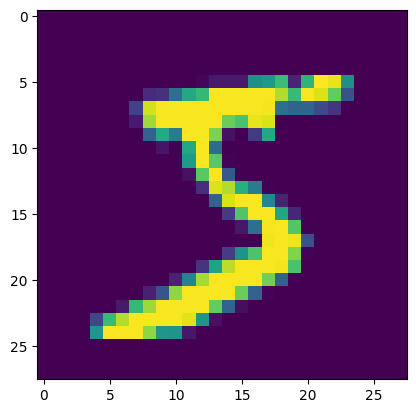

In [4]:
# Show one of the image in dataset
np.set_printoptions(linewidth=200)
plt.imshow(gambar_latih[0])
print('Label latih : ',label_latih[0])

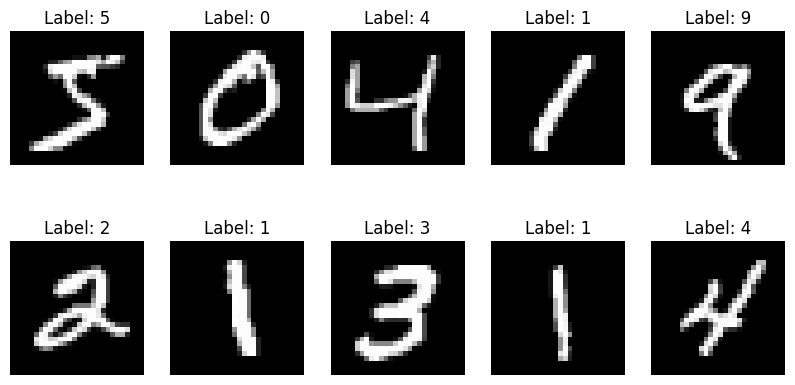

In [15]:
# Visualize some samples
np.set_printoptions(linewidth=200)
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(gambar_latih[i], cmap='gray')
    plt.title(f'Label: {label_latih[i]}')
    plt.axis('off')
plt.show()

In [25]:
# Count the number of each label in the training dataset
label_counts_train = np.bincount(label_latih)
label_counts_test = np.bincount(label_testing)
label_counts = label_counts_train + label_counts_test

print("Jumlah masing-masing label (0-9) dalam dataset MNIST:")
for i in range(10):
    print(f"Label {i}: {label_counts[i]}")

Jumlah masing-masing label (0-9) dalam dataset MNIST:
Label 0: 6903
Label 1: 7877
Label 2: 6990
Label 3: 7141
Label 4: 6824
Label 5: 6313
Label 6: 6876
Label 7: 7293
Label 8: 6825
Label 9: 6958


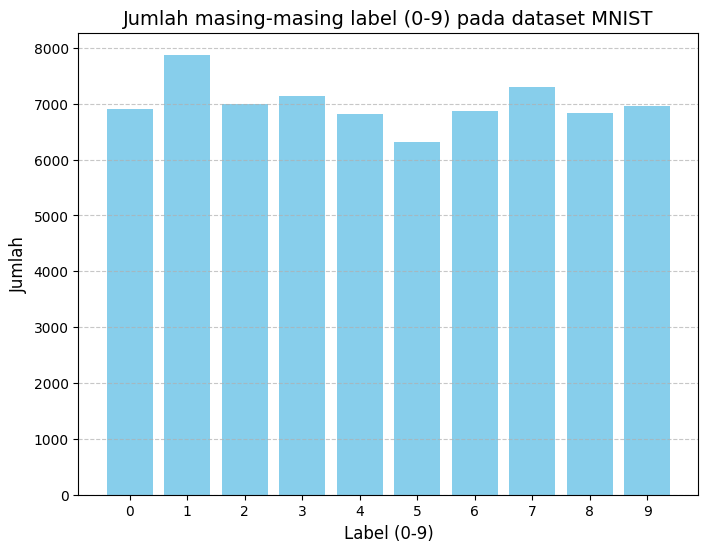

In [26]:
plt.figure(figsize=(8, 6))
plt.bar(range(10), label_counts, color='skyblue')
plt.xlabel('Label (0-9)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.title('Jumlah masing-masing label (0-9) pada dataset MNIST', fontsize=14)
plt.xticks(range(10))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [5]:
# Normalization the dataset
gambar_latih = gambar_latih/255.0
gambar_testing = gambar_testing/255.0

In [6]:
# Modelling
model = Sequential([
    tf.keras.layers.Flatten(input_shape= (28,28)),
    tf.keras.layers.Dense(128, activation= tf.nn.relu),
    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [9]:
print(type(gambar_latih), type(label_latih))
print(gambar_latih.shape, label_latih.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 28, 28) (60000,)


In [10]:
hist=model.fit(gambar_latih, label_latih, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8803 - loss: 0.4232
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9647 - loss: 0.1171
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9765 - loss: 0.0774
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9821 - loss: 0.0579
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9868 - loss: 0.0448


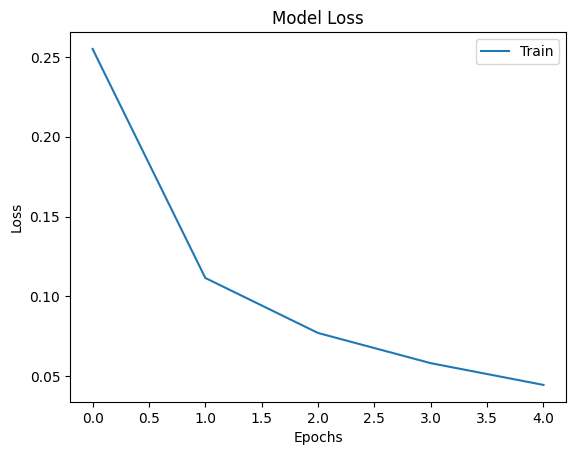

In [11]:
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train'], loc='best')
plt.show()

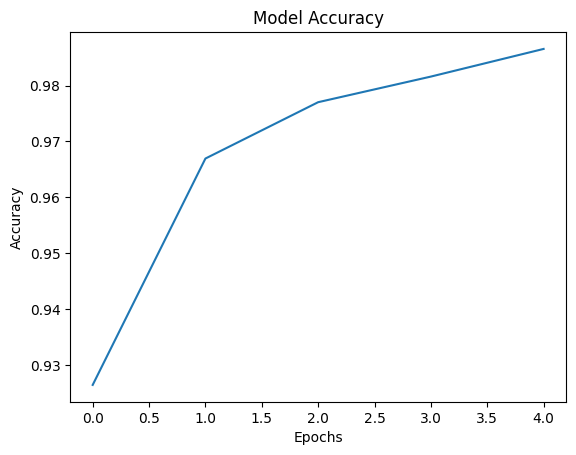

In [12]:
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [22]:
y_pred = model.predict(gambar_testing)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report:")
print(classification_report(label_testing, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.95      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



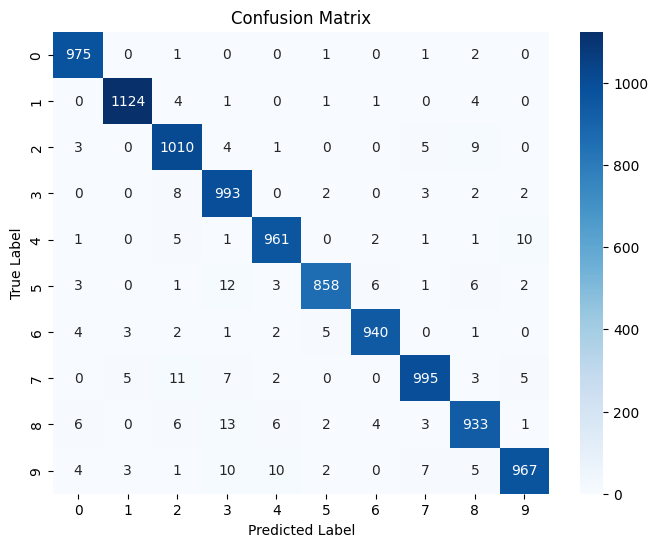

In [23]:
cm = confusion_matrix(label_testing, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [13]:
model.evaluate(gambar_latih, label_latih, batch_size=32)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9921 - loss: 0.0295


[0.03004509210586548, 0.9916499853134155]

In [14]:
# Save model
model.save('Mnist_TensorflowClassification_Model.h5')

* Akurasi Pada dataset pelatihan, model memperoleh akurasi 98.68%, yang juga sangat baik.

* Nilai loss pada pelatihan adalah 0.0448, sedikit lebih tinggi dibandingkan dengan testing loss, namun masih menunjukkan bahwa model telah belajar dengan baik dari data pelatihan.

* Akurasi Model mencapai akurasi 99.21% pada dataset testing. Ini menunjukkan bahwa model sangat baik dalam mengklasifikasikan data yang tidak terlihat selama pelatihan.

* Nilai loss sebesar 0.0295 menunjukkan bahwa model memiliki kesalahan yang rendah saat memprediksi label pada data testing.
<br>

**Classification Report:** <br>
* Precision, recall, dan f1-score untuk semua kelas (0-9) sangat tinggi, di atas 0.95, yang menunjukkan bahwa model sangat konsisten dan andal dalam memprediksi angka-angka tersebut.

* Label 1 memiliki sedikit lebih banyak data, namun tetap mendapatkan nilai 0.99 untuk precision dan recall.

* Label 5 memiliki f1-score sedikit lebih rendah (0.97) dibandingkan label lainnya, namun tetap berada pada tingkat performa yang sangat baik.